<a href="https://colab.research.google.com/github/YuanQi-ME/hello-world/blob/master/Nonlinear_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Start with Nonlinear curve fitting**

Basically follow the instruction from
https://colab.research.google.com/drive/11A5Td8nxGSbThzL0NPwwv-E5GpBa0Fv9

I will use hyperelastic model as example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

print(tf.__version__)

2.2.0


# **Generate data** 
For Neo Hookean model, for uniaxial tension test, 
$W = \frac{\mu}{2} (I - 3) = \frac{\mu}{2} (\lambda^2 + \frac{2}{\lambda} - 3)$

The corresponding nominal stress
$S = \mu (\lambda - \frac{1}{\lambda^2})$

Here, for simplicity, assume $\mu = 1$, all units are omitted.


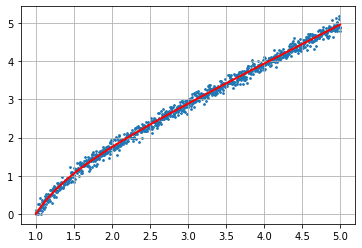

In [2]:
x_data = np.linspace(1, 5, num = 1000)
y_data_true = x_data - 1/x_data**2  # theoretical data

y_data = y_data_true + 0.1*np.random.normal(size=1000)  # add experiment noise

plt.scatter(x_data, y_data, s=3)
plt.plot(x_data, y_data_true, 'r', linewidth = 2)
plt.grid()
plt.show()

# **Create neuro network**

Create two layers each contains 10 units

In [3]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(20, activation = 'relu'))
# model.add(keras.layers.Dropout(0.1))
# model.add(keras.layers.Dense(20, activation = 'relu'))
# model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(5, activation = 'relu'))
# model.add(keras.layers.Dense(5, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


# **Train**

100 epochs

In [4]:
history = model.fit(x_data, y_data, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 5.8835 - accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 4.1591 - accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 2.6192 - accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 1.4133 - accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6556 - accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.0000e+00
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.0000e+00
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.0000e+00
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss:

No handles with labels found to put in legend.


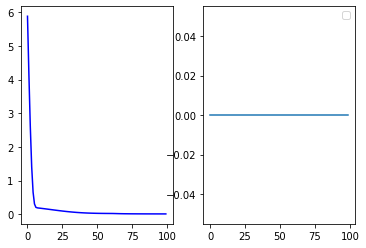

In [5]:
loss = history.history['loss']
acc = history.history['accuracy']

epochs = range(len(loss))
plt.figure()
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.subplot(1,2,2)
plt.plot(epochs, acc)
plt.legend()

plt.show()

# **Predict**


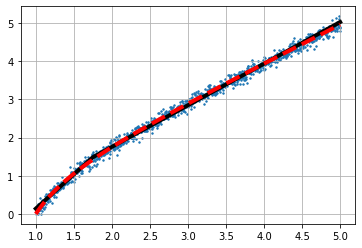

In [6]:
y_predict = model.predict(x_data)

plt.scatter(x_data, y_data, s=2)
plt.plot(x_data, y_predict, 'k', linewidth = 4)
plt.plot(x_data, y_data_true, 'r--', linewidth = 4)
plt.grid()
plt.show()

# **Discussion**
Notice that it was almost linear fit. Especially, for the stretch ratio close to $\lambda = 1$, the nonlinear character was not well captured. 

Next, we try to divide the dataset into train and test dataset.

In [7]:
index_temp = np.arange(1000)
np.random.shuffle(index_temp)

x_train = x_data[index_temp[:800]]
y_train = y_data[index_temp[:800]]
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(50)

x_test = x_data[index_temp[800:]]
y_test = y_data[index_temp[800:]]
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(50)

model = tf.keras.Sequential()
model.add(keras.layers.Dense(1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(5, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, verbose=1)


Epoch 1/20
16/16 [==============================] - 0s 11ms/step - loss: 8.3754 - accuracy: 0.0000e+00 - val_loss: 8.1414 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 7.2830 - accuracy: 0.0000e+00 - val_loss: 7.2232 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 6.3638 - accuracy: 0.0000e+00 - val_loss: 6.1953 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 5.3692 - accuracy: 0.0000e+00 - val_loss: 5.1491 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 4.3808 - accuracy: 0.0000e+00 - val_loss: 4.0941 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 3.4019 - accuracy: 0.0000e+00 - val_loss: 3.0799 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 2.4923 - accuracy: 0.0000e+00 - val_los

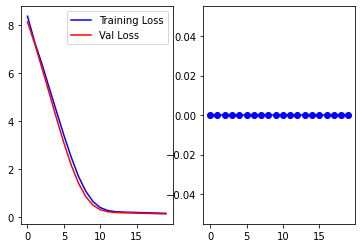

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure()
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.show()



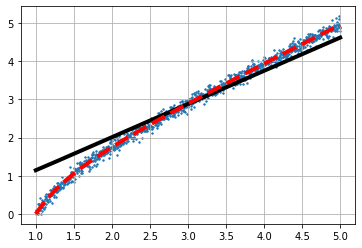

In [9]:
y_predict = model.predict(x_data)

plt.scatter(x_data, y_data, s=2)
plt.plot(x_data, y_predict, 'k', linewidth = 4)
plt.plot(x_data, y_data_true, 'r--', linewidth = 4)
plt.grid()
plt.show()